In [1]:
# data downloaded from http://madm.dfki.de/downloads
#!unzip ~/Documents/Metis/Satellite_Images/data/EuroSAT.zip

unzip:  cannot find or open /home/ubuntu/Documents/Metis/Satellite_Images/data/EuroSAT.zip, /home/ubuntu/Documents/Metis/Satellite_Images/data/EuroSAT.zip.zip or /home/ubuntu/Documents/Metis/Satellite_Images/data/EuroSAT.zip.ZIP.


In [ ]:
#!pip uninstall opencv-python
#!pip install opencv-python==3.4.2.16
#!pip install opencv-contrib-python==3.4.2.16

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
import glob
import pickle
#from skimage.external.tifffile import imread

%matplotlib inline

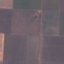

In [3]:
image = Image.open('data/AnnualCrop/AnnualCrop_1.jpg')
image

In [4]:
print(image.format)
print(image.mode)
print(image.size)


JPEG
RGB
(64, 64)


In [91]:
image_path = 'data/'

def image_to_array(img_path, size = None):
    img = Image.open(img_path)
    
    if size:
        img = img.resize(size)
    
    img_array = np.asarray(img, np.float32)
    return img_array

def show_image(img_path):
    img = Image.open(img_path)
    plt.figure(figsize = (3, 3))
    fig = plt.imshow(img, cmap = None)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [5]:
image_array = image_to_array(image_path + 'AnnualCrop/AnnualCrop_1.jpg')
image_array

array([[[149., 121., 120.],
        [147., 121., 120.],
        [146., 120., 119.],
        ...,
        [102.,  90., 100.],
        [104.,  92., 102.],
        [103.,  91., 101.]],

       [[149., 121., 120.],
        [149., 121., 120.],
        [149., 119., 119.],
        ...,
        [102.,  90., 100.],
        [104.,  92., 102.],
        [103.,  91., 101.]],

       [[143., 117., 116.],
        [144., 115., 117.],
        [147., 116., 121.],
        ...,
        [102.,  92., 101.],
        [102.,  90., 100.],
        [103.,  91., 101.]],

       ...,

       [[141., 117., 115.],
        [141., 117., 117.],
        [137., 117., 118.],
        ...,
        [103.,  93., 102.],
        [100.,  90., 101.],
        [101.,  90., 104.]],

       [[130., 111., 113.],
        [132., 112., 114.],
        [129., 110., 116.],
        ...,
        [105.,  94., 102.],
        [105.,  93., 103.],
        [107.,  95., 107.]],

       [[122., 106., 109.],
        [122., 105., 111.],
        [120., 1

In [6]:
print(image_array.shape)

(64, 64, 3)


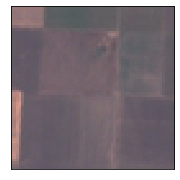

In [93]:
show_image(image_path + 'AnnualCrop/AnnualCrop_1.jpg')
plt.savefig('image_example.png', dpi = 200)

In [12]:
file_direc_list = os.listdir(image_path)
file_direc_list.remove('.DS_Store')
file_direc_list

['River',
 'Industrial',
 'AnnualCrop',
 'PermanentCrop',
 'SeaLake',
 'Highway',
 'Residential',
 'HerbaceousVegetation',
 'Forest',
 'Pasture']

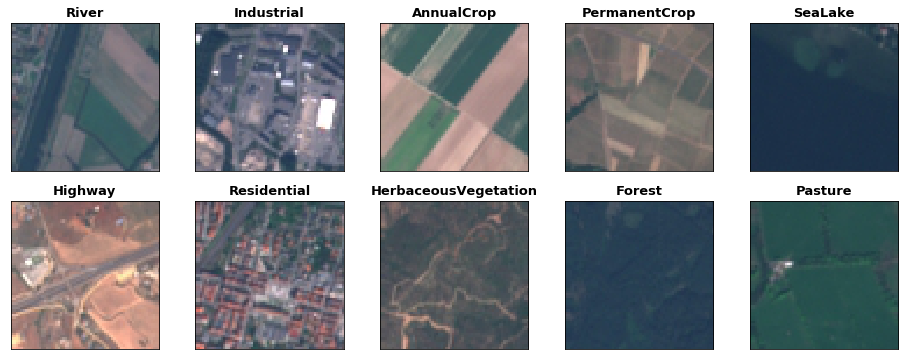

In [75]:
examples = [(image_path + c + '/' + c + '_13.jpg', c) for c in file_direc_list]
plt.figure(figsize = (16, 6))
for ind, img in enumerate(examples):
    plt.subplot(2, 5, ind + 1)
    show_image(img[0])
    plt.title(img[1], fontsize = 13, weight = 'bold')
plt.savefig('image_grid.png', dpi = 500)

In [76]:
filelist = glob.glob(image_path + '**/*.jpg', recursive = True)
len(filelist)

27000

In [77]:
def compile_images_array(path):
    direc_list = os.listdir(path)
    direc_list.remove('.DS_Store')
    
    collection = []
    labels = []
    
    for image_type in direc_list:
        for image in os.listdir(path + image_type):
            
            if '.tif' in image:
                collection.append(imread(path + image_type + '/' + image).flatten())
            else:
                collection.append(image_to_array(path + image_type + '/' + image).flatten())
            
            labels.append(image_type)
    return np.asarray(collection, np.float32), labels

In [186]:
RGB_wide, RGB_labels = compile_images_array(image_path)
print(RGB_wide.dtype)
print(RGB_wide.shape)
print(len(RGB_labels))
print(RGB_labels[0:5])

float32
(27000, 12288)
27000
['Forest', 'Forest', 'Forest', 'Forest', 'Forest']


In [187]:
image = imread('data/EuroSAT_all_bands/AnnualCrop/AnnualCrop_1.tif')
print(image.dtype)
print(type(image))
print(image.shape)
print(image.size)

uint16
<class 'numpy.ndarray'>
(64, 64, 13)
53248


In [188]:
all_channels_wide, all_channels_labels = compile_images_array('data/EuroSAT_all_bands/')
print(all_channels_wide.dtype)
print(all_channels_wide.shape)
print(len(all_channels_labels))
print(all_channels_labels[0:5])

float32
(27000, 53248)
27000
['Forest', 'Forest', 'Forest', 'Forest', 'Forest']


In [189]:
all_channels_wide[0:5]

array([[1164.,  801.,  625., ...,  831.,  354., 2271.],
       [1076.,  785.,  665., ..., 1747.,  669., 4277.],
       [1203.,  812.,  654., ..., 1558.,  612., 3743.],
       [ 993.,  702.,  536., ..., 1305.,  508., 3267.],
       [1072.,  773.,  688., ..., 1639.,  602., 4196.]], dtype=float32)

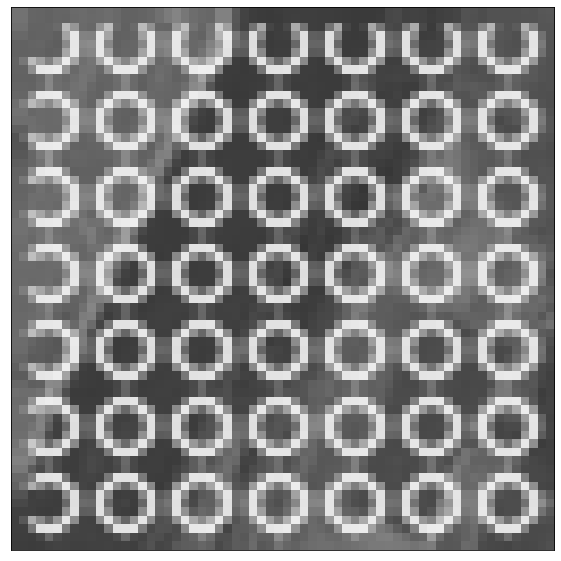

In [101]:
img = cv2.imread('data/River/River_1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()

step_size = 8

keypoints = [cv2.KeyPoint(x, y, step_size) for y in range(4, img_gray.shape[0], step_size) 
             for x in range(4, img_gray.shape[1], step_size)]

img = cv2.drawKeypoints(img_gray, keypoints, img, color = (255, 255, 255))

plt.figure(figsize = (10, 10))
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig('dsift_example.png', dpi = 500)
plt.show()
plt.close()

dense_sift = sift.compute(img_gray, keypoints)

In [90]:
print(dense_sift[1].shape)
dense_sift[1]

(64, 128)


array([[  0.,   0.,   0., ...,   3.,   3.,  32.],
       [  0.,   0.,   0., ...,   4.,   2.,  44.],
       [  0.,   0.,   0., ...,   1.,   2., 136.],
       ...,
       [ 53.,   1.,   0., ...,   0.,   0.,   0.],
       [112.,   1.,   2., ...,   0.,   0.,   0.],
       [ 71.,  11.,  28., ...,   0.,   0.,   0.]], dtype=float32)

In [82]:
def process_images_dsift(path):
    direc_list = os.listdir(path)
    
    if '.DS_Store' in direc_list:
        direc_list.remove('.DS_Store')
    
    collection = []
    labels = []
    
    for image_type in direc_list:
        for image in os.listdir(path + image_type):
            
            img = cv2.imread(path + image_type + '/' + image)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            sift = cv2.xfeatures2d.SIFT_create()
            
            step_size = 8
            keypoints = [cv2.KeyPoint(x, y, step_size) 
                         for y in range(4, img_gray.shape[0], step_size) 
                         for x in range(4, img_gray.shape[1], step_size)]
            
            dense_sift = sift.compute(img_gray, keypoints)
            collection.append(dense_sift[1].flatten())
            
            labels.append(image_type)
            
    return np.asarray(collection, np.float32), labels

In [83]:
dsift_features, dsift_labels = process_images_dsift(image_path)
print(dsift_features.dtype)
print(dsift_features.shape)
print(len(dsift_labels))
print(dsift_labels[0:5])

float32
(27000, 8192)
27000
['River', 'River', 'River', 'River', 'River']


In [191]:
pickle.dump(np.asarray(RGB_wide, np.uint16), open('RGB_wide.pickle', 'wb'))
pickle.dump(np.asarray(all_channels_wide, np.uint16), open('all_channels_wide.pickle', 'wb'))

In [196]:
pickle.dump(RGB_labels, open('RGB_labels.pickle', 'wb'))
pickle.dump(all_channels_labels, open('all_channels_labels.pickle', 'wb'))

In [84]:
pickle.dump(dsift_labels, open('dsift_labels.pickle', 'wb'))
pickle.dump(dsift_features, open('dsift_features.pickle', 'wb'))